In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']




In [4]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
trains = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT']



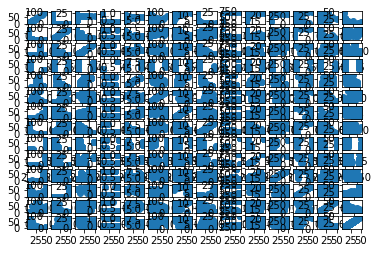

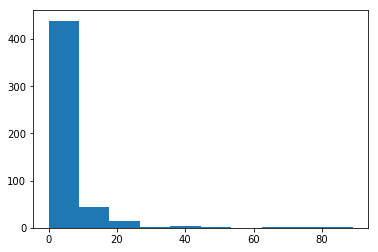

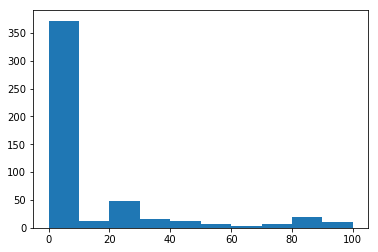

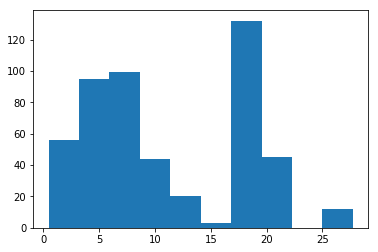

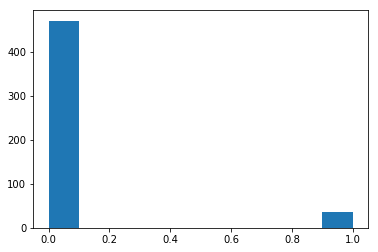

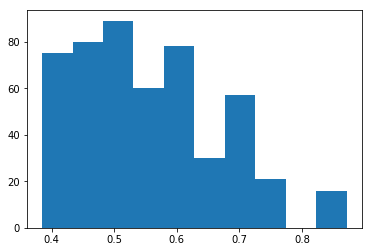

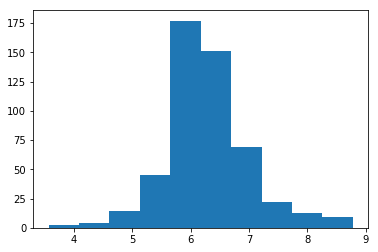

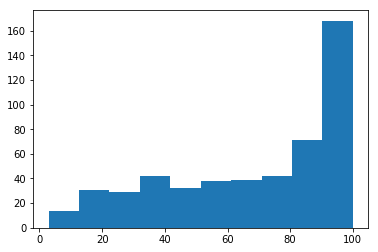

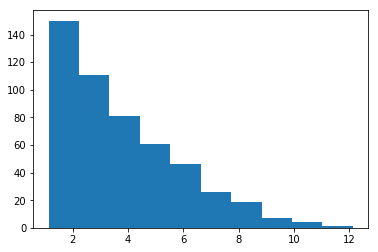

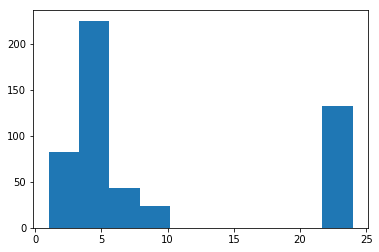

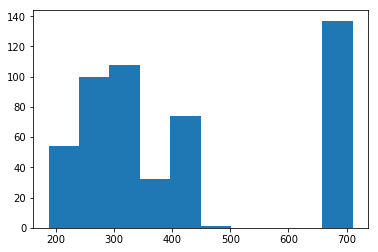

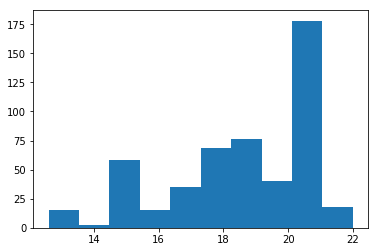

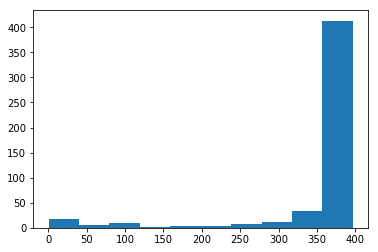

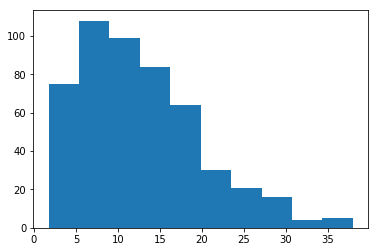

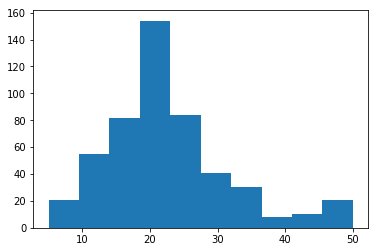

In [46]:
"""correlation map of the 13 features """


fig, ax = plt.subplots(nrows=len(cols), ncols=len(cols))

inds = 1


    

for rows in np.arange(len(cols)):
    for columns in np.arange(len(cols)):
        ax[rows][columns].scatter(df[cols[rows]],df[cols[columns]])

plt.show()


for rows in np.arange(len(cols)):
    plt.hist(df[cols[rows]])
    plt.show()
    plt.xlabel(cols[rows])
    plt.ylabel('frequency')

In [5]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

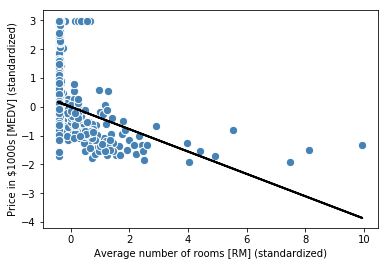

In [6]:
X = df[['CRIM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()



CRIM -0.39
ZN 0.36
INDUS -0.48
CHAS 0.18
NOX -0.43
RM 0.7
AGE -0.38
DIS 0.25
RAD -0.38
TAX -0.47
PTRATIO -0.51
B 0.33
LSTAT -0.74


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


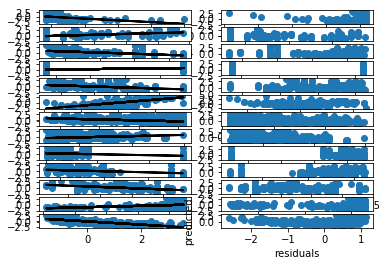

['LSTAT', 'RM', 'PTRATIO'] [-0.44331663  0.34559158 -0.2191272 ]


In [33]:
"""simple linera regression and the multi-linear regression"""

fig, ax = plt.subplots(nrows=len(trains), ncols=2)


corrs = []
num = 0
for rows in trains:
    X = df[[rows]].values
    X_std = sc_x.fit_transform(X)
    lr = LinearRegressionGD()
    lr.fit(X_std, y_std)
    print( rows, round(lr.w_[1],2))
    ax[num][0].scatter(X_std, y_std)
    ax[num][0].plot(X_std, lr.predict(X_std), color='black', lw=2)
    corrs.append(abs(lr.w_[1])) 
    ax[num][1].scatter(lr.predict(X_std), y_std - lr.predict(X_std))
    plt.ylabel('predicted')
    plt.xlabel('residuals')
    num += 1
    
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

#obtain three highest features
threeMax = sorted(zip(corrs, trains), reverse=True)[:3]
print('Three most correlated features of linear regression are : ')
print(threeMax)

newLabels = [threeMax[0][1], threeMax[1][1], threeMax[2][1]]

#multiple regression  and residual plots 
newX = df[newLabels].values
newX_std = sc_x.fit_transform(newX)
mr = LinearRegressionGD()
mr.fit(newX_std,y_std)
print(newLabels, mr.w_[1:])

    

Three highest features from simple linear regression was LSTAT, RM and PTRATIO. Multiple regression of the three features give off lower coefficients for the each feature compared to the coefficients from the simple linear regression. 

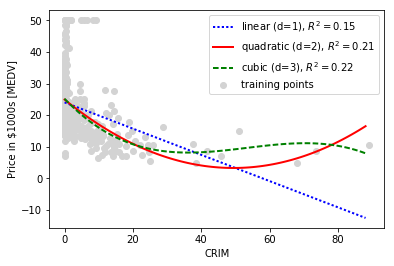

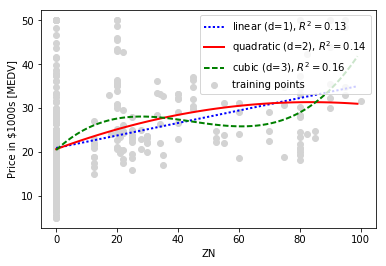

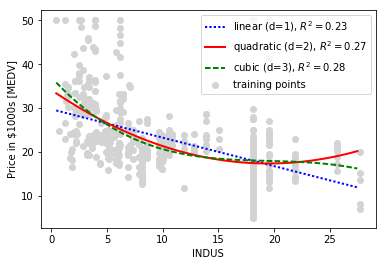

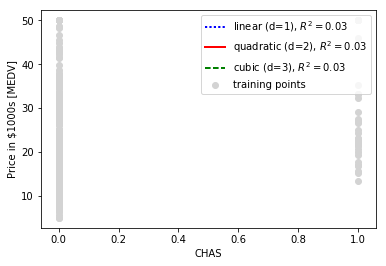

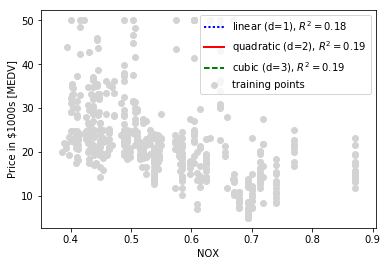

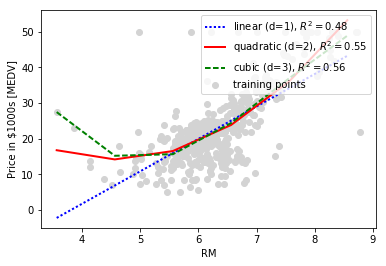

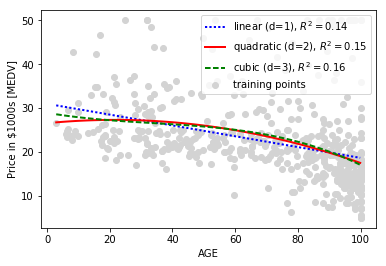

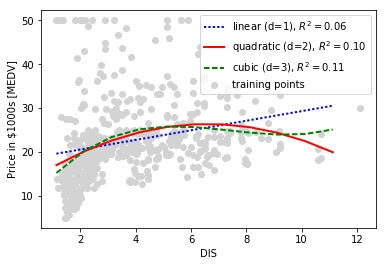

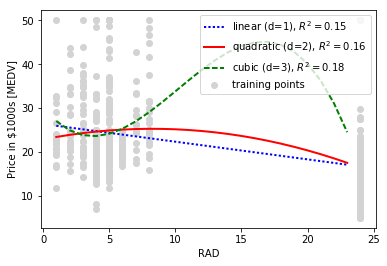

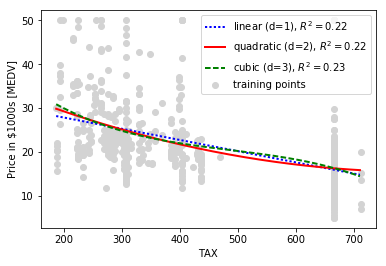

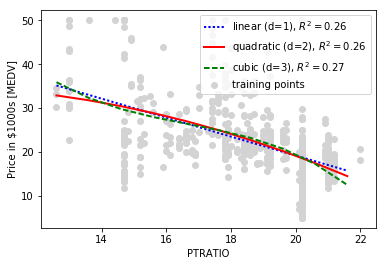

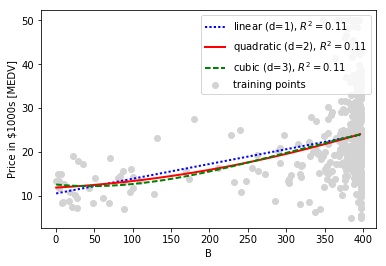

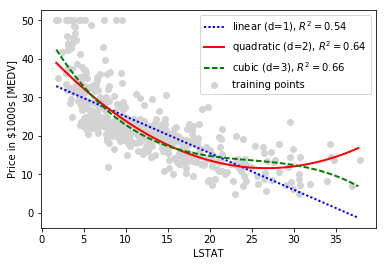

In [11]:

"""simple regression of the cubic and quad"""

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
quad_corrs = []
cubic_corrs = []
lin_corrs = []

for rows in trains:
    X = df[[rows]].values
    y = df['MEDV'].values

    regr = LinearRegression()

    # create quadratic features
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(X)

    # fit features
    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

    regr = regr.fit(X, y)
    y_lin_fit = regr.predict(X_fit)
    linear_r2 = r2_score(y, regr.predict(X))

    regr = regr.fit(X_quad, y)
    y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
    quadratic_r2 = r2_score(y, regr.predict(X_quad))

    regr = regr.fit(X_cubic, y)
    y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
    cubic_r2 = r2_score(y, regr.predict(X_cubic))


    # plot results
    plt.scatter(X, y, label='training points', color='lightgray')

    plt.plot(X_fit, y_lin_fit, 
             label='linear (d=1), $R^2=%.2f$' % linear_r2, 
             color='blue', 
             lw=2, 
             linestyle=':')
    


    

    plt.plot(X_fit, y_quad_fit, 
             label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
             color='red', 
             lw=2,
             linestyle='-')
    

    plt.plot(X_fit, y_cubic_fit, 
             label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
             color='green', 
             lw=2, 
             linestyle='--')

    plt.xlabel(rows)
    plt.ylabel('Price in $1000s [MEDV]')
    plt.legend(loc='upper right')



    
    #plt.savefig('images/10_11.png', dpi=300)
    plt.show()
    lin_corrs.append(linear_r2)
    quad_corrs.append(quadratic_r2)
    cubic_corrs.append(cubic_r2)


Overall, the performance of the cubic was slightly better than the other two (linera and quadratic). However, the better fitting is probably due to larger number of parameters for estimating the coefficients. 

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


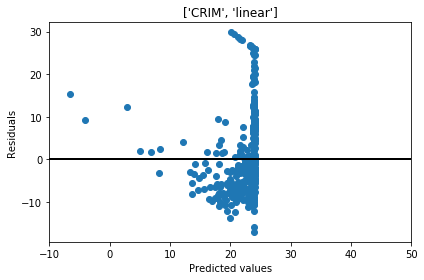

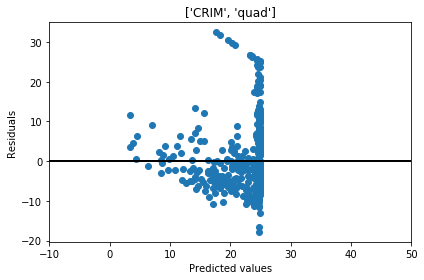

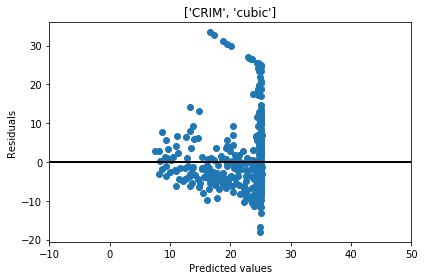

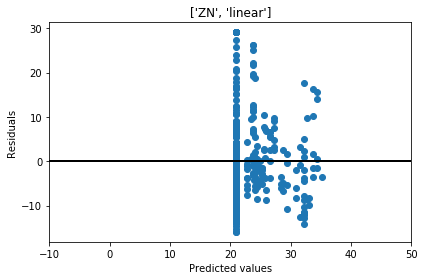

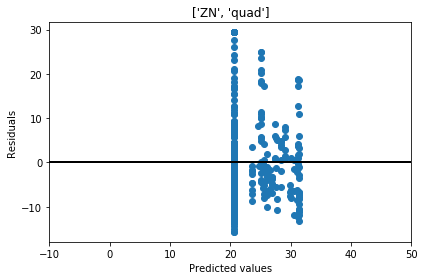

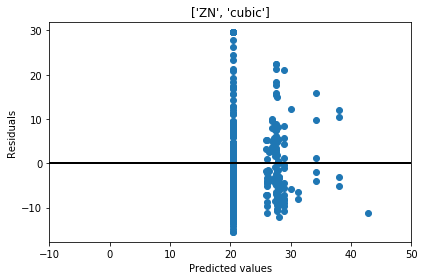

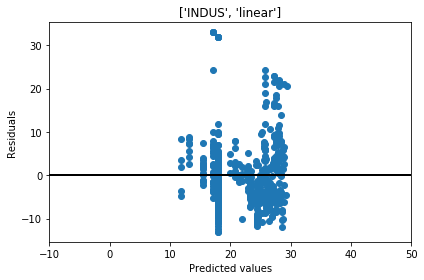

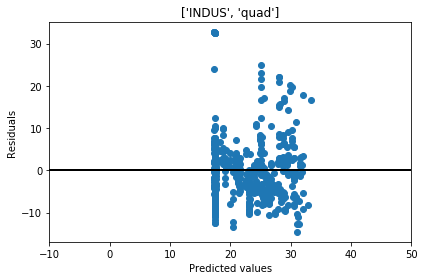

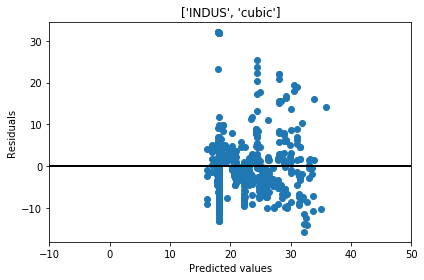

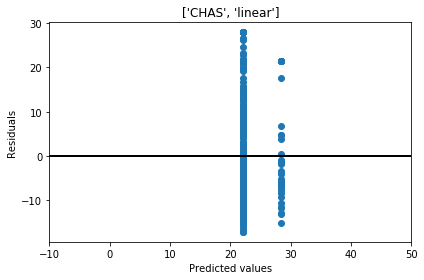

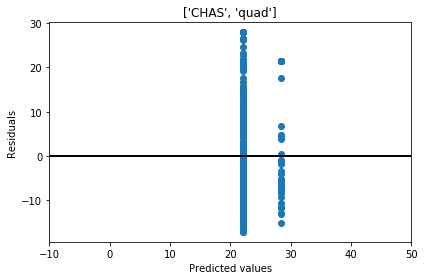

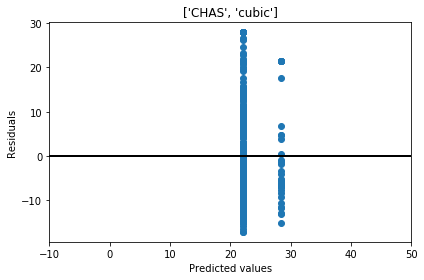

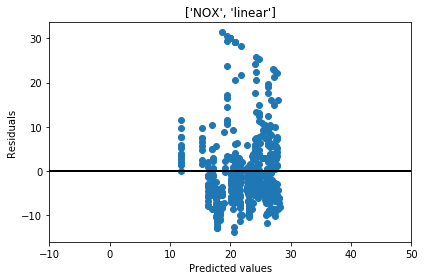

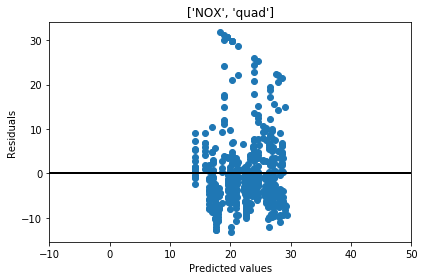

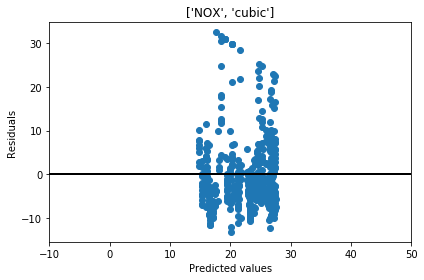

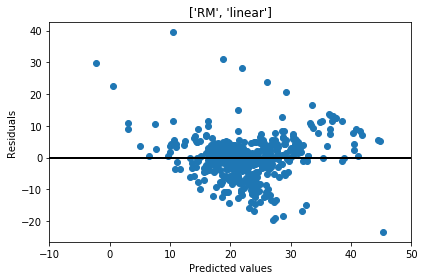

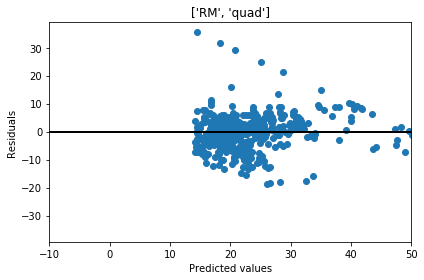

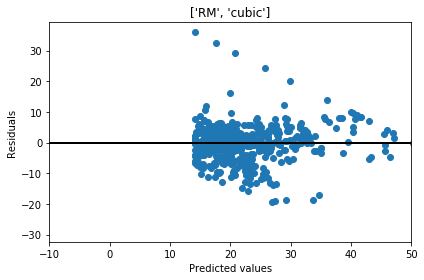

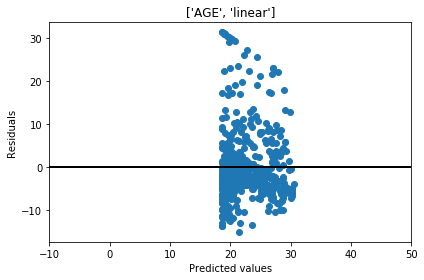

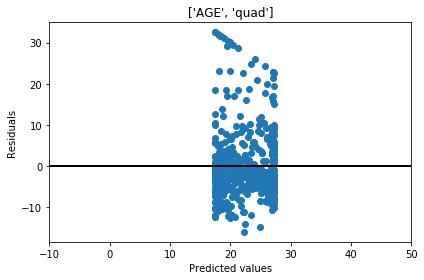

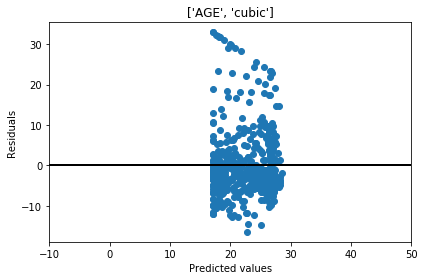

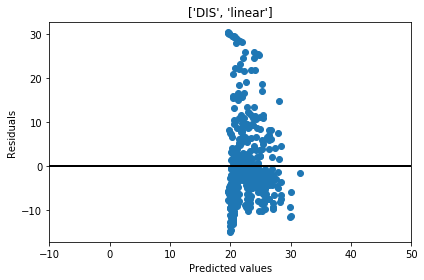

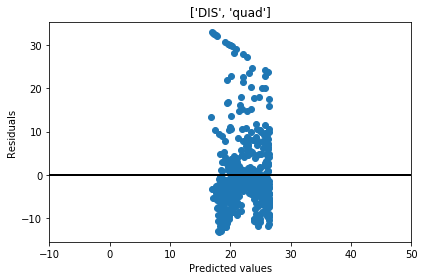

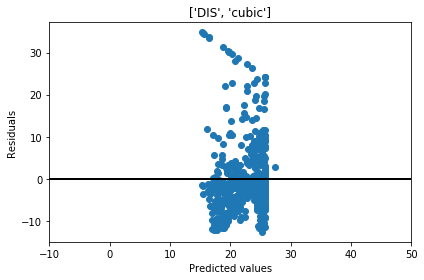

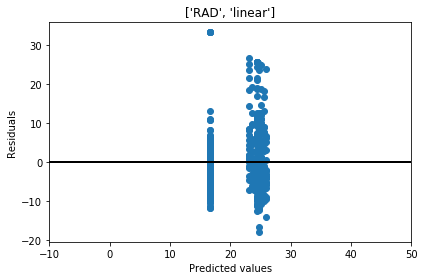

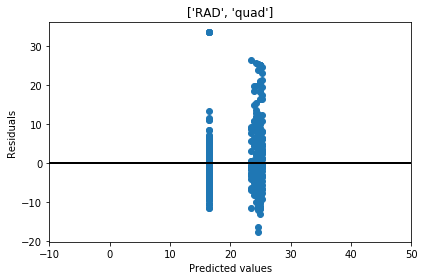

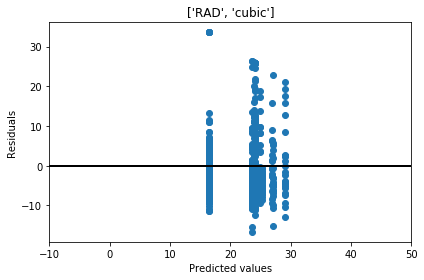

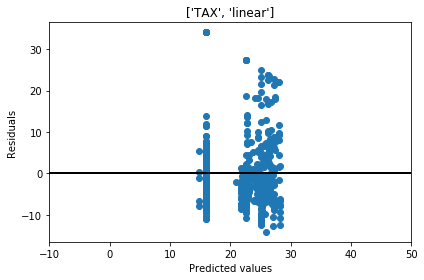

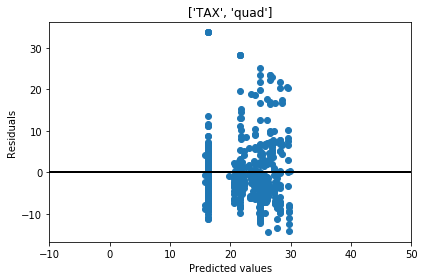

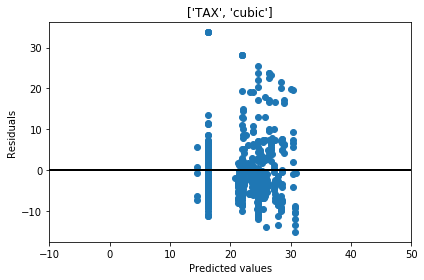

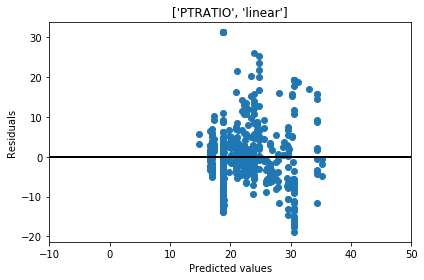

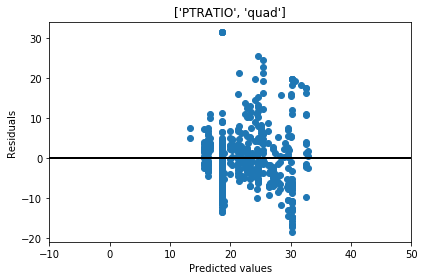

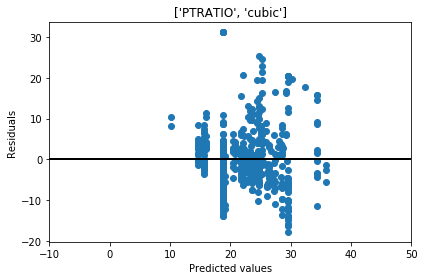

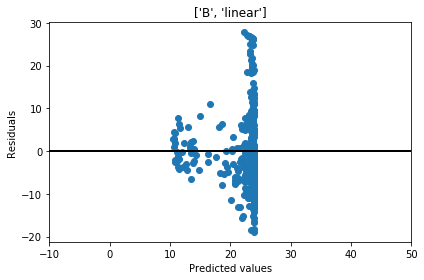

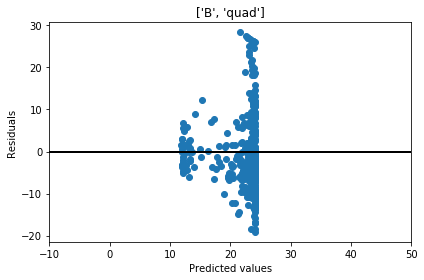

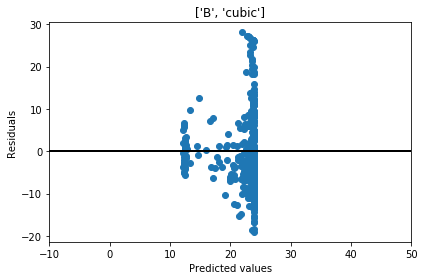

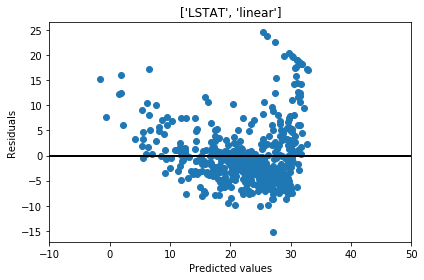

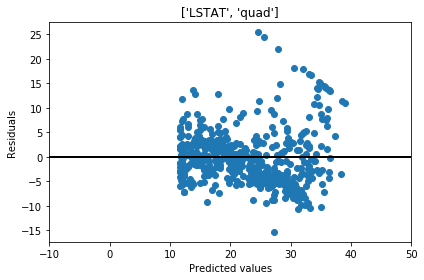

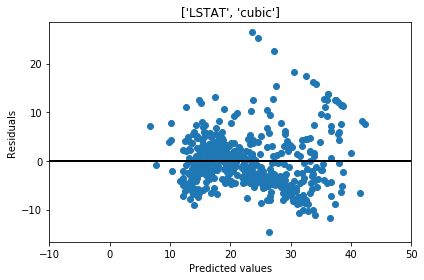

In [44]:
"""
residual plotting for cubic and quad 

"""

for rows in trains:
    X = df[[rows]].values
    y = df['MEDV'].values

    regr = LinearRegression()

    # create quadratic features
    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(X)   
    
    regr = regr.fit(X, y)
    y_lin_fit = regr.predict(X)
    err = y-y_lin_fit
    plt.scatter(y_lin_fit, err)
    titleName = [rows, 'linear']
    plt.title(titleName)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
    plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()
    
    
    regr = regr.fit(X_quad, y)
    y_quad_fit = regr.predict(X_quad)
    err= y-y_quad_fit
    titleName = [rows, 'quad']
    plt.scatter(y_quad_fit,err)
    plt.title(titleName)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
    plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()

    
    regr = regr.fit(X_cubic, y)
    titleName = [rows, 'cubic']
   
    y_cubic_fit = regr.predict(X_cubic)
    err= y-y_cubic_fit
    plt.scatter(y_cubic_fit, err)
    plt.title(titleName)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
    plt.xlim([-10, 50])
    plt.tight_layout()       
    plt.show()


The Three most correlated features of the quad and cubic regressions were the same : LSTAT, RM and INDUS. 

In [42]:
"""
multiple regression of the cubic and the quad transformed data
"""

print('Three most correlated features of quad regression are : ')
quad_threeMax = sorted(zip(quad_corrs, trains), reverse=True)[:3]
print(quad_threeMax)


print('Three most correlated features cubic are : ')
cubic_threeMax = sorted(zip(cubic_corrs, trains), reverse=True)[:3]
print(cubic_threeMax)

quad_newLabels = [quad_threeMax[0][1], quad_threeMax[1][1], quad_threeMax[2][1]]
cubic_newLabels = [cubic_threeMax[0][1], cubic_threeMax[1][1], cubic_threeMax[2][1]]

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

    

newX = df[quad_newLabels].values
newX_quad =  quadratic.fit_transform(newX)
mr = LinearRegression()
mr.fit(newX_quad,y_std)
quadratic_r2 = r2_score(y, mr.predict(newX_quad))

print('coefficients of the quadratic regression :')
print(mr.coef_)


newX = df[cubic_newLabels].values
newX_cubic =  cubic.fit_transform(newX)
mr = LinearRegression()
mr.fit(newX_cubic,y_std)
cubic_r2 = r2_score(y, mr.predict(newX_cubic))
print('coefficients of the cubic regression :')
print(mr.coef_)


print('R^2 quad: %.3f, cubic: %.3f' % (
    quadratic_r2,
    cubic_r2))


Three most correlated features of quad regression are : 
[(0.64071689716366109, 'LSTAT'), (0.5484256373971057, 'RM'), (0.26872313999754105, 'INDUS')]
Three most correlated features cubic are : 
[(0.6578476405895719, 'LSTAT'), (0.56122572263553883, 'RM'), (0.2768343456208131, 'INDUS')]
R^2 quad: -5.848, cubic: -5.842


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


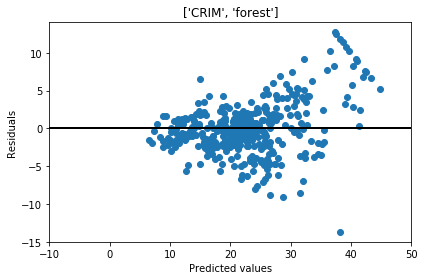

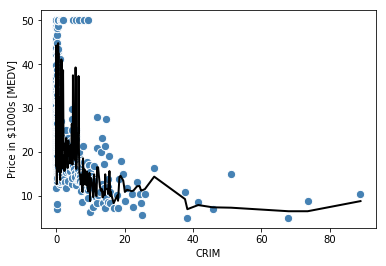

CRIM
MSE train: 11.710, test: 106.245
R^2 train: 0.862, test: -0.305


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


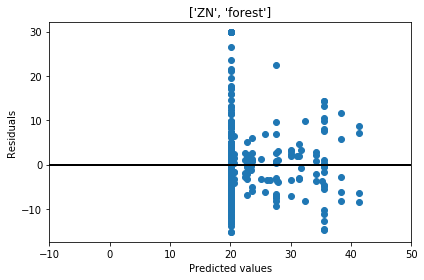

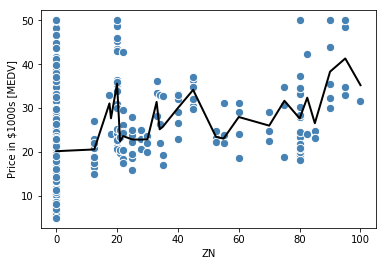

ZN
MSE train: 59.836, test: 82.212
R^2 train: 0.297, test: -0.010


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


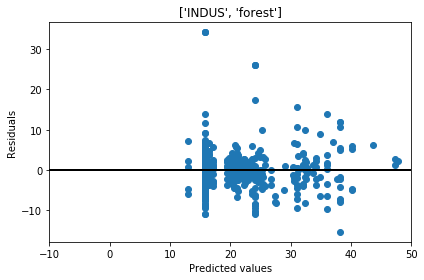

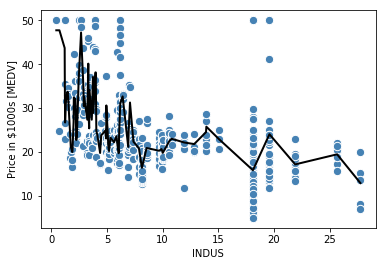

INDUS
MSE train: 33.786, test: 72.872
R^2 train: 0.603, test: 0.105


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


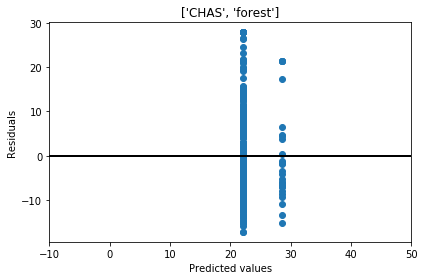

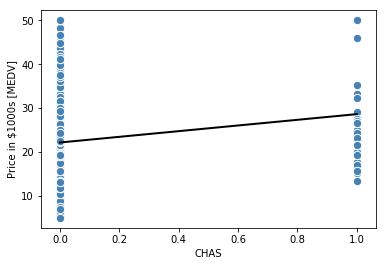

CHAS
MSE train: 82.458, test: 79.361
R^2 train: 0.032, test: 0.025


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


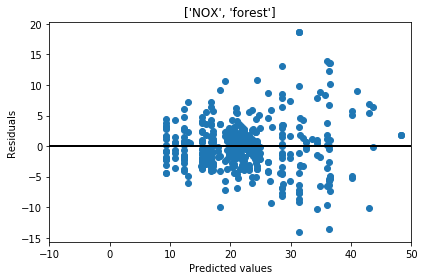

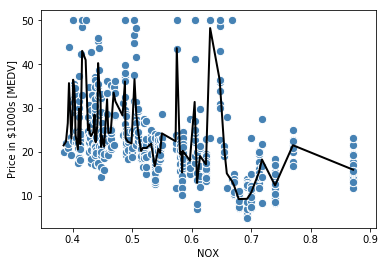

NOX
MSE train: 19.001, test: 56.746
R^2 train: 0.777, test: 0.303


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


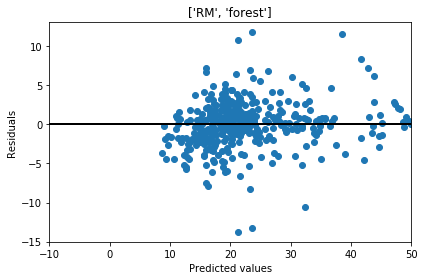

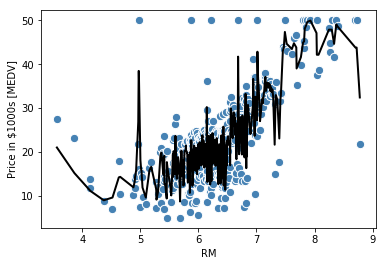

RM
MSE train: 8.711, test: 50.621
R^2 train: 0.898, test: 0.378


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


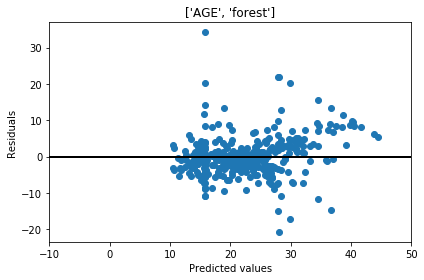

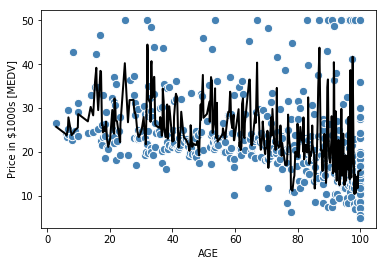

AGE
MSE train: 27.497, test: 127.578
R^2 train: 0.677, test: -0.567


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


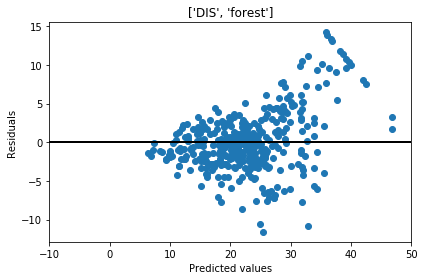

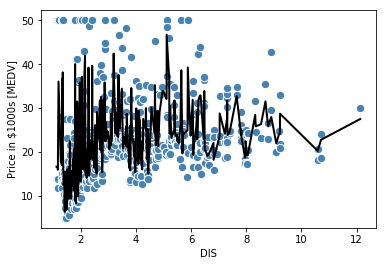

DIS
MSE train: 14.698, test: 98.762
R^2 train: 0.827, test: -0.213


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


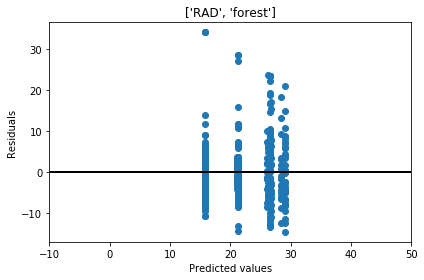

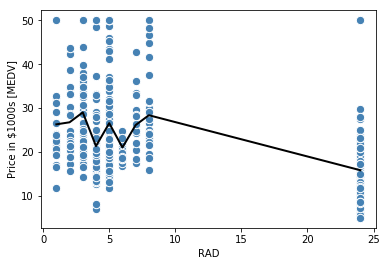

RAD
MSE train: 62.880, test: 77.482
R^2 train: 0.261, test: 0.048


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


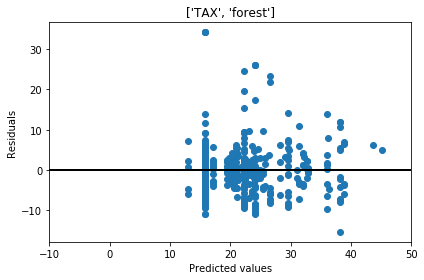

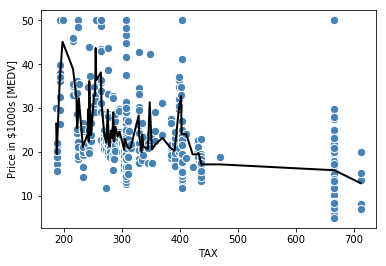

TAX
MSE train: 42.737, test: 77.351
R^2 train: 0.498, test: 0.050


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


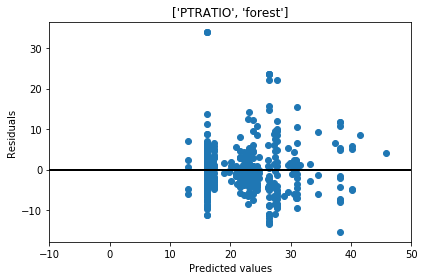

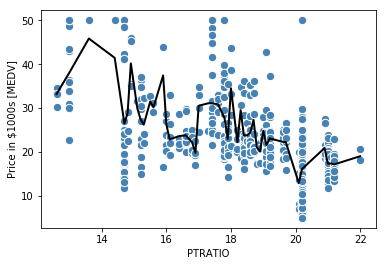

PTRATIO
MSE train: 44.550, test: 72.773
R^2 train: 0.477, test: 0.106


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


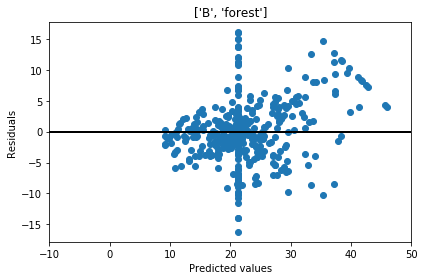

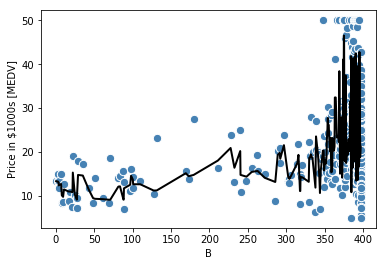

B
MSE train: 25.020, test: 101.963
R^2 train: 0.706, test: -0.252


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


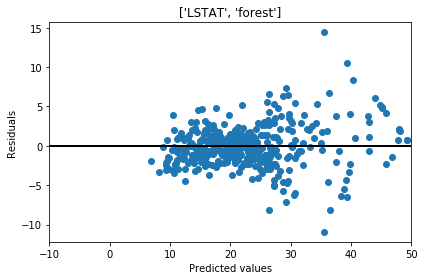

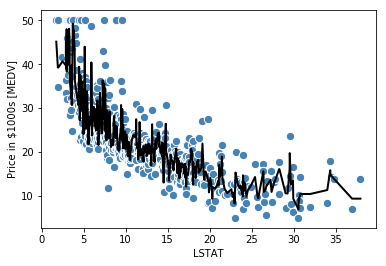

LSTAT
MSE train: 6.916, test: 40.161
R^2 train: 0.919, test: 0.507


In [27]:
"""
Random Forest individaul feature regression

"""


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

r2 = []
for rows in trains:

    X = df[[rows]].values
    y = df['MEDV'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

    forest = RandomForestRegressor(n_estimators=1000, 
                                   criterion='mse', 
                                   random_state=1, 
                                   n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    
    

    #drawing residual
    err = y_train - y_train_pred
    titleName = [rows, 'forest']
    plt.scatter(y_train_pred,err)
    plt.title(titleName)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
    plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()
    
    #drawomg scatter and decision lines 
    sort_idx = X.flatten().argsort()
    lin_regplot(X[sort_idx], y[sort_idx], forest)
    plt.xlabel(rows)
    plt.ylabel('Price in $1000s [MEDV]')
    #plt.savefig('images/10_13.png', dpi=300)
    plt.show()

    
    r2.append(r2_score(y_train, y_train_pred))
    print(rows)
    
    

    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))
    
score = r2
name = trains
ForestBigThree = sorted(zip(score, name), reverse=True)[:3]

In simple random forest regression with one feature, LSTAT, RM, and CRIM showed the highest correlation with the target data. While the data was overall well-fit to the training data, most features performed poorly to the test data. 

In [26]:
"""
Random Forest multiple regression
"""

NewForestFeatures = [ForestBigThree[0][1], ForestBigThree[1][1], ForestBigThree[2][1]]
print(NewForestFeatures)

X = df[NewForestFeatures].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)
forest = RandomForestRegressor(n_estimators=1000, 
                                   criterion='mse', 
                                   random_state=1, 
                                   n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

['LSTAT', 'RM', 'CRIM']
MSE train: 2.079, test: 24.459
R^2 train: 0.976, test: 0.700


In Random Forest multiple regression, explained .97 percent of the variance of the data. However, in the test set, the accuracy dropped to 70 percent. 

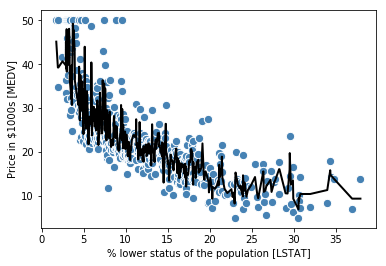

In [13]:
    sort_idx = X.flatten().argsort()
    lin_regplot(X[sort_idx], y[sort_idx], forest)
    plt.xlabel('% lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000s [MEDV]')
    #plt.savefig('images/10_13.png', dpi=300)
    plt.show()

In [75]:
#get three maximum 
score = lr.w_[1:]
name = trains
sorted(zip(score, name), reverse=True)[:3]

[(238794.24525695908, 'INDUS'),
 (236162.98158370843, 'NOX'),
 (233143.85154296673, 'TAX')]